In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf
from skrf import Network
from skrf import plotting
import math
# The example uses pylab - I think this further encourages sloppy usage. 
# from pylab import *

<hr>
Modified   By   Reason <br>
17-Jan-22  CBL  Original <br>
Online docs: <br>
<ul>
<li> https://scikit-rf.readthedocs.io/en/latest/tutorials/Plotting.html </li>
<li> github associated with this: https://github.com/scikit-rf/ </li>
<li> https://scikit-rf.readthedocs.io/en/latest/examples/networktheory/Transmission%20Line%20Properties%20and%20Manipulations.html </li>
</ul>
<H1> Voltages and Currents </H1>
Now assume that the previous circuit is excited by a source delivering a voltage of 1 Volt
and associated to a source impedance of $Z_s = 100 \Omega $ <br>
<img src="transmission_line_properties_vi.svg" />
<hr>

In [3]:
# skrf figure styling
rf.stylely()

In [4]:
Z_s = 100  # Ohm
V_s = 1    # V

# From previous example
freq = rf.Frequency(250, npoints=1, unit='MHz')
Z_0 = 75  # Ohm
Z_L = 150  # Ohm
d   = 12  # m
VF  = 0.67
att = 0.02 # Np/m. Equivalent to 0.1737 dB/m
alpha = att  # Np/m !
beta = freq.w/rf.c/VF
gamma = alpha + 1j*beta
Gamma_in = rf.zl_2_Gamma_in(Z_0, Z_L, theta=gamma*d)

In [5]:
# Z in is not yet defined
Z_in = rf.zl_2_zin(Z_0, Z_L, gamma * d)
print('Input impedance Z_in=', Z_in)

Input impedance Z_in= [94.79804694+29.52482706j]


At the input of the transmission line, the voltage is a voltage divider circuit: <br>
<center> 
$V_{in} = V_{s} {Z_{in} \over{Z_s + Z_{in}}} $
</center>

In [6]:
V_in = V_s * Z_in / (Z_s + Z_in)
print('Voltage at transmission line input : V_in = ', V_in, ' V')

Voltage at transmission line input : V_in =  [0.49817591+0.07605964j]  V


and the current at the input of the transmission line is: <br>
<center> 
$I_{in} = {V_{s}\over{Z_s + Z_{in}}} $
</center>


In [7]:
I_in = V_s / (Z_s + Z_in)
print('Current at transmission line input : I_in = ', I_in, ' A')

Current at transmission line input : I_in =  [0.00501824-0.0007606j]  A


which represent a power of: <br>
<center>
$P_{in} = {1\over 2} R [V_{in}I^*_{in}] $
</center>

In [8]:
P_in = 1/2 * np.real(V_in * np.conjugate(I_in))
print('Input Power : P_in = ', P_in, 'W')

Input Power : P_in =  [0.00122106] W


The reflected power is: <br>
<center>
$P_r = |\Gamma_{in}|^2 P_{in} $
</center>

In [9]:
P_r = np.abs(Gamma_in)**2 * P_in
print('Reflected power : P_r = ', P_r, 'W')

Reflected power : P_r =  [5.19482699e-05] W


The voltage and current at the load can be deduced from the ABCD parameters of the line of length L:

In [10]:
V_out, I_out = rf.voltage_current_propagation(V_in, I_in, Z_0,theta= gamma*d)
print('Voltage at load: V_out = ', V_out, 'V')
print('Current at load: I_out = ', I_out, 'A')

Voltage at load: V_out =  [0.41779105+0.18944365j] V
Current at load: I_out =  [0.00278527+0.00126296j] A


Note that voltages and currents are expressed a peak values. RMS values are:

In [11]:
print(abs(V_out)/math.sqrt(2), abs(I_out)/math.sqrt(2))

[0.32437498] [0.0021625]


The power delivered to the load is:

In [12]:
P_out = 1/2 * np.real(V_out * np.conjugate(I_out))
print('Power delivered to the load : P_out = ', P_out, ' W')

Power delivered to the load : P_out =  [0.00070146]  W


Voltage and current are plotted below against the transmission line length (pay attention to the sign of d in the voltage and current propagation: as we go from source ( $z=d$) to the load ($z=0$), $\theta $ goes in the opposite direction and should be inversed)

In [13]:
ds = np.linspace(0, d, num=1001)

thetas = - gamma*ds

v1 = np.full_like(ds, V_in)
i1 = np.full_like(ds, I_in)

v2, i2 = rf.voltage_current_propagation(v1, i1, Z_0, thetas)

<string>:6: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 1.0, 'Voltage')

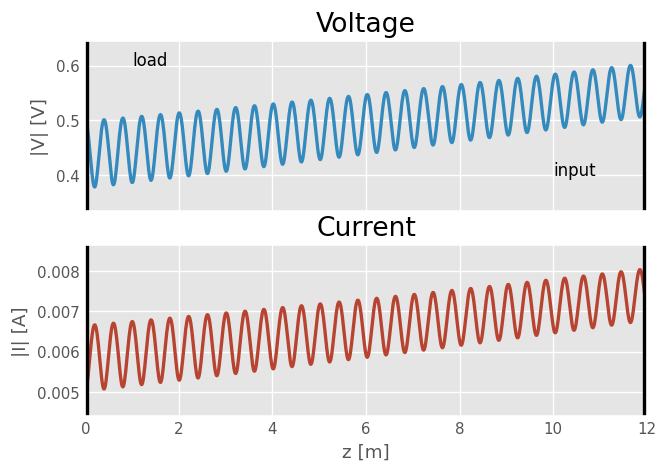

In [14]:
fig, (ax_V, ax_I) = plt.subplots(2, 1, sharex=True)
ax_V.plot(ds, abs(v2), lw=2)
ax_I.plot(ds, abs(i2), lw=2, c='C1')
ax_I.set_xlabel('z [m]')
ax_V.set_ylabel('|V| [V]')
ax_I.set_ylabel('|I| [A]')


ax_V.axvline(0, c='k', lw=5)
ax_I.axvline(0, c='k', lw=5)
ax_V.text(d-2, 0.4, 'input')
ax_V.text(1, 0.6, 'load')
ax_V.axvline(d, c='k', lw=5)
ax_I.axvline(d, c='k', lw=5)

ax_I.set_title('Current')
ax_V.set_title('Voltage')

scikit-rf provides media objects too. Next example. 

In [15]:
#
# I'm curious
rf.zl_2_swr(Z_0, Z_L)

array([2.])